#### <center>Intermediate Python and Software Enginnering</center>


## <center>Section 02 - Excercises</center>


### <center>Innovation Scholars Programme</center>
### <center>King's College London, Medical Research Council and UKRI <center>

# Exercises

The purpose of this notebook is to practice with the concepts of lambda expressions, zip, iterators, generators, and itertools.

---
## Some functions and lambdas!

Here is a string (run this cell first):

In [26]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'

# get the consonants by converting alphabet to a set and getting the difference between it and the set of vowels
consonants = set(alphabet).difference('aeiou')

The `map` function applies a given function to each value from an input data structure and produces the output from that function. For example, doubling a list of integers:

```python
    mapvals = map(lambda i: i * 2, [1, 2, 3, 4])
    print(list(mapvals)) # prints [2, 4, 6, 8]
```

### Exercise 1:
Using the map function with a lambda, create a new version of `alphabet` the vowels 'aeiou' converted to uppercase. 

Hint: the in-place conditional expression
```python
    X if COND else Y
```
will equal `X` if expression `COND` evaluates to True otherwise will equal `Y`, you might want to use this in your lambda.

In [27]:
# print out string 'alphabet' with all vowels in upper case
print(list(map(lambda x: x.upper() if x in 'aeiou' else x, alphabet)))

['A', 'b', 'c', 'd', 'E', 'f', 'g', 'h', 'I', 'j', 'k', 'l', 'm', 'n', 'O', 'p', 'q', 'r', 's', 't', 'U', 'v', 'w', 'x', 'y', 'z']


Using the map function and a function you define, convert all the consonants to uppercase:

In [28]:
def consonants_to_upper(x):
    return x.upper() if x in consonants else x

# print out string 'alphabet' with all consonants in upper case
print(''.join(map(consonants_to_upper, alphabet)))

aBCDeFGHiJKLMNoPQRSTuVWXYZ


Print out `alphabet` with all vowels in upper case then with all consonants in lower case:

In [66]:
print(''.join(sorted([c.upper() if c in 'aeiou' else c for c in alphabet],key=lambda i: i.lower() not in 'aeiou')))
print(''.join([c.upper() if c in 'aeiou' else c for c in alphabet]))

AEIOUbcdfghjklmnpqrstvwxyz
AbcdEfghIjklmnOpqrstUvwxyz


Bonus: given the simplicity of the operations above, you could write either as a list comprehension:

In [30]:
print(''.join([c.upper() if c in 'aeiou' else c for c in alphabet]))

AbcdEfghIjklmnOpqrstUvwxyz


---
## Populate a dictionary

### Exercise 2:
Given a list of cities and a corresponding list of populations:
* Create a dictionary out of cities and populations using zip()
* Print out each city and its population by alphabetic order
* Print out each city and its population by decreasing population size

In [100]:
cities = ['Johannesburg', 'Beijing', 'Tokyo', 'London', 'Rio de Janeiro']
populations = [4949000, 21707000, 13515000, 8825000, 6520000]

d = dict(zip(cities, populations))
print(sorted(d.items()))
print(sorted(d.items(), key=lambda x: -x[1]))
print(d.items())

[('Beijing', 21707000), ('Johannesburg', 4949000), ('London', 8825000), ('Rio de Janeiro', 6520000), ('Tokyo', 13515000)]
[('Beijing', 21707000), ('Tokyo', 13515000), ('London', 8825000), ('Rio de Janeiro', 6520000), ('Johannesburg', 4949000)]
dict_items([('Johannesburg', 4949000), ('Beijing', 21707000), ('Tokyo', 13515000), ('London', 8825000), ('Rio de Janeiro', 6520000)])


---
## Inner Functions and Partial

Using partial, it is possible to 'bind' values to a function's parameters and then return a new callable object which can then be called with further unbound parameters. 

### Exercise 3:
Using partial, we can create a function `treble_and_add_two` by binding the values `3` and `2` to `x` and `c` of a defined function `mult_and_add`:

In [32]:
from functools import partial 

def mult_and_add(x,y,c):
    return x * y + c

treble_and_add_two = partial(mult_and_add, x=3, c=2)

print(treble_and_add_two(y=4))

14


### Exercise 4:
Write a function that allows you to bind values to `x` an `c` and returns a callable object that you can supply `y` to. Use it to make a function that doubles `y` and adds `3` to it:

In [61]:
def mult_and_add_factory(x, c):
    def _inner_fn(y):
        return x * y + c
      
    return _inner_fn

def mult_and_add_lambda_factory(x, c):
    return lambda y: x * y + c

double_and_add_three = mult_and_add_factory(2, 3)
print(double_and_add_three(y=4))

quadruple_and_add_five = mult_and_add_lambda_factory(4, 5)
print(quadruple_and_add_five(y=3))

11
17


---
## Args + Kwargs

As you have seen in the slides, python provides a special argument `*args`, which takes any number of positional parameters. 

### Exercise 5:
Using \*args, write a function `mult_plus_a_bit` that takes a variable number of inputs and multiplies them together, adding a bit to each new parameter before the multiplication:

In [34]:

def mult_plus_a_bit(*args, a_bit=1e-3):
    current = 1.0
    for a in args:
        current *= (a + a_bit)
    return current

print(mult_plus_a_bit(*[1, 2, 3], a_bit=0.2))
print(mult_plus_a_bit(1, 2, 3, 4, a_bit=0.2))

8.448
35.4816


### Exercise 6:
Define a function which takes a variable number of keyword arguments and prints them with their values one per line in alphabetical order:

In [73]:
def print_kws1(**kwargs):
    print('Initial order')
    for k, v in kwargs.items():
        print(k,'=',v)

def print_kws2(**kwargs):
    print('Sorted by key')
    for k, v in sorted(kwargs.items()):
        print(k,'=',v)
        
def print_kws3(**kwargs):
    print('Sorted by value')
    for k, v in sorted(kwargs.items(), key=lambda i : str(i[1])):
        print(k,'=',v)
    
print_kws1(foo='bar', x=123, a='eh?')
print_kws2(foo='bar', x=123, a='eh?')
print_kws3(foo='bar', x=123, a='eh?')
# Should print:
#   a = eh?
#   foo = bar
#   x = 123

Initial order
foo = bar
x = 123
a = eh?
Sorted by key
a = eh?
foo = bar
x = 123
Sorted by value
x = 123
foo = bar
a = eh?


---
## Some Sorting

The `sorted` function can be used to get the sorted version of a data structure in sorted order:

In [36]:
sentence = 'I Like Pizza With Pineapple.'

def basic_sort(s):
    return sorted(s)

print(basic_sort(sentence))

[' ', ' ', ' ', ' ', '.', 'I', 'L', 'P', 'P', 'W', 'a', 'a', 'e', 'e', 'e', 'h', 'i', 'i', 'i', 'i', 'k', 'l', 'n', 'p', 'p', 't', 'z', 'z']


### Exercise 7:
Filter out non-letters from string and sort the rest:

In [56]:
def sort_alphanumerics1(s):
    # non-letters are getting in the way! filter them out and sort the letters
    return ''.join(sorted(filter(lambda x: x.isalpha(), s)))

def sort_alphanumerics2(s):
    # non-letters are getting in the way! filter them out and sort the letters
    return ''.join(sorted([x for x in s if x.isalpha()]))

def sort_alphanumerics3(s):
    # non-letters are getting in the way! filter them out and sort the letters
    def _inner_filter(seq):
        for i in seq:
            if i.isalpha():
                yield i
    return ''.join(sorted(_inner_filter(s)))

print(sort_alphanumerics1(sentence))
print(sort_alphanumerics2(sentence))
print(sort_alphanumerics3(sentence))

ILPPWaaeeehiiiiklnpptzz
ILPPWaaeeehiiiiklnpptzz
ILPPWaaeeehiiiiklnpptzz


### Exercise 8:
Sort with non-letters removed and capital letters last rather than first. Two potential approaches:
* Split into two strings, and sort both independently
* Sort the string using a clever function for the 'key' parameter: `sorted(s, key=lambda x: do something clever with x)`

In [83]:
def sort_with_capitals_last1(s):
    lower = []
    upper = []
    for i in s:
        if i.isalpha():
            if i.isupper():
                upper.append(i)
            else:
                lower.append(i)
    return ''.join(sorted(lower) + sorted(upper))

def sort_with_capitals_last2(s):
    fs = filter(lambda x: x.isalpha(), s)
    sorted_s = sorted(fs, key=lambda x: (x.isupper(),x))
    return ''.join(sorted_s)

print(sort_with_capitals_last1(sentence))
print(sort_with_capitals_last2(sentence))

aaeeehiiiiklnpptzzILPPW
aaeeehiiiiklnpptzzILPPW


### Exercise 9:
Given `sentence`, reverse the ordering of words in the sentence, ie. "I ekil azzip htiw elppaenip". Python has a number of different ways that strings can be reversed:
* Think about treating strings as lists
* Consider slice syntax

In [86]:
def reverse_words_using_reverse(s):
    words = s.split()
    revwords = map(lambda w: ''.join(reversed(w)), words)
    return ' '.join(revwords)


def reverse_words_using_slice(s):
    words = s.split()
    revwords = list(map(lambda w: w[::-1], words))
    return ' '.join(revwords)


def reverse_words_the_hard_way(s): # not quite equivalent?
    ls = list(s)

    def find_word_start(s, i):
        while i < len(s) and not s[i].isalpha():
            i += 1
        return i

    def find_word_end(ls, i):
        while i < len(s) and s[i].isalpha():
            i += 1
        return i
    
    def reverse_word(s, start_inc, end_exc):
        i = start_inc
        j = end_exc-1
        while i < j:
            s[i], s[j] = s[j], s[i]
            i += 1
            j -= 1
            
    cend = 0
    while True:
        cstart = find_word_start(ls, cend)
        if cstart == len(ls):
            break
        cend = find_word_end(ls, cstart)
        reverse_word(ls, cstart, cend)
        if cend == len(ls):
            break
        cstart = cend
    return ''.join(ls)

  
for fn in reverse_words_using_reverse, reverse_words_using_slice, reverse_words_the_hard_way:
    print(fn(sentence))

I ekiL azziP htiW .elppaeniP
I ekiL azziP htiW .elppaeniP
I ekiL azziP htiW elppaeniP.


---
## Exercise 10: Change Machine

Emulate a machine that gives out change:
* The user puts in a certain amount of money
* The machine works out how much change the user is due given a total price
* The machine always gives the fewest possible coins to make the change
* Assume that the machine always has all denominations of coins available
* The machine is configured with a set of coin denominations, eg. (1, 5, 10, 50, 100).
  * This is an example of a 'nice' set of coins
  * Later workshops will revisit this problem in a harder mode with optimisation through dynamic programming.

In [40]:
class ChangeMachine:
    def __init__(self, denominations):
        self._denominations = sorted(denominations)
        
    def give_change(self, price, supplied):
        # Creation of a dictionary to accumulate the change to return
        change = {d:0 for d in self._denominations}
        # Computation of the total amount to return
        remaining = supplied - price
        for i in reversed(self._denominations):
            while remaining >= i:
                change[i] += 1
                remaining -= i
        return change

m = ChangeMachine([1, 5, 10, 50, 100]) # denominations in ascending order
print(m.give_change(732, 1000)) # buying something for 732 with 1000 in cash

{1: 3, 5: 1, 10: 1, 50: 1, 100: 2}


---
## Extra Exercise 11: Args + Kwargs

The following function `fn` does a lot of useful stuff, but relies on lists being passed to it in a sorted order - use partial or an inner function to ensure that the list that is passed is always sorted

In [41]:
def fn(a, b, data=None, coeff_a=1.0, coeff_b=1e-4):
    if not data:
        return [], []
    max_d = data[-1] # dangerous assumption - the data is sorted!
    out_data_a = [coeff_a * x / max_d + a for x in data]
    out_data_b = [coeff_b * x / max_d + b for x in data]
    return out_data_a, out_data_b


print('wrong!', fn(2, 3, data=[2, 7, 1, 9, 8, 3]))
print('correct!', fn(2, 3, data=[1,2,3,7,8,9]))

# wrap this function so that a sorted list is passed to the library function, you'll have to consider the data to sort being in either args or kwargs
def my_fn(*args, **kwargs):
    if len(args) >= 3:
        args = list(args)
        args[2] = sorted(args[2])
    elif 'data' in kwargs:
        kwargs['data'] = sorted(kwargs['data'])
    return fn(*args, **kwargs)

print(my_fn(1, 2, [1,3,2]))
print(my_fn(1, 2, data=[1,3,2]))
print(my_fn(1, 2, [1,3,2], 2, -0.5))
print(my_fn(1, 2, [1,3,2], coeff_a=2, coeff_b=-0.5))
print(my_fn(a=1, b=2, data=[1,3,2], coeff_a=2, coeff_b=-0.5))
print(my_fn(coeff_b=-0.5, coeff_a=2, data=[1,3,2], a=1, b=2))


wrong! ([2.6666666666666665, 4.333333333333334, 2.3333333333333335, 5.0, 4.666666666666666, 3.0], [3.0000666666666667, 3.0002333333333335, 3.0000333333333336, 3.0003, 3.0002666666666666, 3.0001])
correct! ([2.111111111111111, 2.2222222222222223, 2.3333333333333335, 2.7777777777777777, 2.888888888888889, 3.0], [3.000011111111111, 3.0000222222222224, 3.0000333333333336, 3.000077777777778, 3.000088888888889, 3.0001])
([1.3333333333333333, 1.6666666666666665, 2.0], [2.0000333333333336, 2.0000666666666667, 2.0001])
([1.3333333333333333, 1.6666666666666665, 2.0], [2.0000333333333336, 2.0000666666666667, 2.0001])
([1.6666666666666665, 2.333333333333333, 3.0], [1.8333333333333333, 1.6666666666666667, 1.5])
([1.6666666666666665, 2.333333333333333, 3.0], [1.8333333333333333, 1.6666666666666667, 1.5])
([1.6666666666666665, 2.333333333333333, 3.0], [1.8333333333333333, 1.6666666666666667, 1.5])
([1.6666666666666665, 2.333333333333333, 3.0], [1.8333333333333333, 1.6666666666666667, 1.5])


---
## Range and Enumerate

We've seen the use of range() in a lot of places, which takes a start, stop, and step value to define a range of values. 

### Exercise 12
:
Provide an iterator class implementation to replicate this behaviour:

In [101]:
class my_range:
    def __init__(self, start, end_exclusive):
        self._start = start
        self._end_exclusive = end_exclusive

    def __iter__(self):
        self._current = self._start
        return self
        
    def __next__(self):
        if self._current >= self._end_exclusive:
            raise StopIteration
        else:
            current = self._current
            self._current += 1
            return current
        
print(list(my_range(1,10)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


### Exercise 13:
Implement iterator again as a generator function:

In [43]:
def my_range_gen(start,end):
    i=0
    while i<end:
        yield i
        i+=1
        
print(list(my_range_gen(1,10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


The function `enumerate()` produces pairs from a given iterable containing an incrementing count and the value itself, eg.:

```python
list(enumerate('hello')) 
>>> [(0, 'h'), (1, 'e'), (2, 'l'), (3, 'l'), (4, 'o')]
```
### Exercise 14:
Provide a generator implementation of this function:

In [44]:
def my_enumerate(iterable):
    i = 0
    for e in iterable:
        yield i, e
        i += 1
        
print(list(my_enumerate(['a','b','c','d','e'])))

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e')]


---
### Exercise 15:
Write a function that returns the prime numbers between 2 and 'n' inclusive. There are lots of ways this can be done, both algorithmically and in terms of python. Think for loops, for...else loops, use of 'any', generators, etc. Feel free to use the simplest algorithm you can think of but try to implement this in at least two different ways.

In [88]:
def primeloop(n):
    result=[]
    
    for i in range(2, n+1):

        foundmultiple = False
        for j in range(i-1, 1, -1):
            if i % j == 0:
                foundmultiple = True
                break

        if not foundmultiple:
            result.append(i)
            
    return result
            
print(primeloop.__name__)
print(primeloop(50))

# Other solutions:

# use a for...else loop (quite a python-specific construct)
# this avoids the requirement for a local variable
def primeloop2(n):
    result=[]
    
    for i in range(2, n+1):

        for j in range(i-1, 1, -1):
            if i % j == 0:
                break
        else:
            result.append(i)
            
    return result


def primeloop3(n):
    result=[]
    
    for i in range(2, n+1):
        if not any(i%j==0 for j in range(i-1, 1, -1)):
            result.append(i)
            
    return result
            
            
def primeloop4(n):
    hasDivisor=lambda i: any(i%j==0 for j in range(i-1, 1, -1))
    
    return [i for i in range(2,n+1) if not hasDivisor(i)]
            
            
def getprimes(n, primeloop):
    result = list()
    
    primeloop(n, result)
            
    return result


for op in primeloop,primeloop2,primeloop3,primeloop4:
    print(op.__name__)
    print(op(100))

primeloop
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
primeloop
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
primeloop2
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
primeloop3
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
primeloop4
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


---
## Collatz conjecture

The Collatz conjecture is a sequence of numbers starting with any positive integer and obeying the following rules:
* If a value is odd, the next value is 3 * value + 1
* If a value is even, the next value is value / 2

Amazingly, a Collatz sequence starting with any positive integer is conjectured to always end up at 1. 

### Exercise 16: 
Write a generator using yield to generate the Collatz sequence starting with a positive integer that stops once the value 1 is reached:

In [95]:
def collatz(start):
    cur = start
    yield cur
    while cur != 1:
        cur = 3 * cur + 1 if cur % 2 else int(cur / 2)
        yield cur

# eg. list(collatz(12)) should print [12, 6, 3, 10, 5, 16, 8, 4, 2, 1]

for i in range(1, 15):
    print(list(collatz(i)))

[1]
[2, 1]
[3, 10, 5, 16, 8, 4, 2, 1]
[4, 2, 1]
[5, 16, 8, 4, 2, 1]
[6, 3, 10, 5, 16, 8, 4, 2, 1]
[7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[8, 4, 2, 1]
[9, 28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[10, 5, 16, 8, 4, 2, 1]
[11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[12, 6, 3, 10, 5, 16, 8, 4, 2, 1]
[13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]


### Exercise 17: 
Using this function, we can plot how many iterations are required for a given starting integer to reach 1 use matplotlib to generate a chart showing this for all positive integers up to 50 (inclusive):

<BarContainer object of 50 artists>

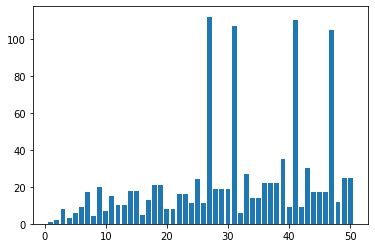

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

max_i = 50
plt.bar([i for i in range(1,max_i+1)], [len(list(collatz(i))) for i in range(1, max_i+1)])

---
## Extra Exercise 18: Palindromic Substring

Palindromic substrings are sequences of letters with symmetry, i.e. reversing the string results in a set of letters in the same order as the starting string. 'abba' is a palindromic string for example. Write a palindromic substring checker that finds the longest palidromic substring in each of the three given sentences.

In [96]:
sentence1 = 'abcdefg' # all of these letters are palindromic substrings of length 1
sentence2 = 'foreverevereies' # 'reverever' is the palindromic substring here
sentence3 = 'hereinliesabbaseilforeverevere'


def palindromic_substring_brute_force(sentence):
    def isPalindrome(s):
        return s[0]==s[-1] and isPalindrome(s[1:-1]) if s else True

    lims = (0,1)
    for i in range(len(sentence)):
        for j in range(i+1,len(sentence)):
            if isPalindrome(sentence[i:j]):
                if j - i > lims[1] - lims[0]:
                    lims = (i, j)
    return sentence[lims[0]:lims[1]]


def palindromic_substring(sentence):
    def str_size(s, e):
        return e - s + 1
    max_start = 0
    max_end = 0
    
    for i in range(0, len(sentence)):
        s = i
        e = i
        # firstly, find out if this is the start of a sequence of identical characters
        while e+1 < len(sentence) and sentence[e+1] == sentence[e]:
            e += 1
        
        # now look backwards and forwards, as long as the new letters are identical to
        # each other
        while s-1 >= 0 and e+1 < len(sentence) and sentence[s-1] == sentence[e+1]:
            s -= 1
            e += 1

        if str_size(s, e) > str_size(max_start, max_end):
            max_start = s
            max_end = e
    
    return sentence[max_start: max_end +1]
      
print(palindromic_substring(sentence1))
print(palindromic_substring(sentence2))
print(palindromic_substring(sentence3))

a
reverever
liesabbaseil


---
## Extra Exercise 19: Count the k-mers

A k-mer is a sequence of letters of length k (e.g. accg is a k-mer of length 4). We have provided you the a generator 'generate_letters' to create the sequence. Feel free to rewrite it another way or experiment with it however you like.

Write the function `find_kmers` which:
 1. Finds all k-mers in the given sequence of DNA
 2. Prints the k-mers in decreasing frequency order with sequences of equal frequency in alphabetical order (read docs on sorted to see how to use `key` argument)
 3. Prints a list of all k-mers which do not appear in the sequence
 
Your solution should work for k-mers of length 3, 4, and 5.

In [49]:
import random
from collections import defaultdict

def generate_letters(length, seed=12345678):
    letters = ['a', 'c', 'g', 't']
    
    random.seed(seed) # using a constant seed ensures the sequences of values from randint is the same
    
    for _ in range(length):
        yield letters[random.randint(0, 3)]

        
dnasequence = ''.join(generate_letters(1000))


def find_kmers(length, dna):
    d = defaultdict(int)

    for i in range(length, len(dna)):
        d[dna[i-length:i]] += 1


    d_freq_sorted = sorted(d.items(), key=lambda x: (-x[1], x[0]))
    r = ' '.join(str((v, k)) for k,v in d_freq_sorted)
    print(r)

    import itertools as it

    args = ['acgt'] * length
    allkmers = set(''.join(i) for i in it.product(*args))
    print(sorted(list(allkmers.difference(d.keys()))))
    print(len(allkmers.difference(d.keys())))
    print()


find_kmers(3, dnasequence)
find_kmers(4, dnasequence)
find_kmers(5, dnasequence)

(30, 'acg') (26, 'gtt') (26, 'tac') (23, 'cta') (22, 'cca') (22, 'tag') (22, 'ttt') (21, 'cgt') (21, 'gat') (20, 'aaa') (20, 'ata') (19, 'aga') (19, 'cac') (19, 'gaa') (19, 'gcc') (19, 'tcc') (19, 'tct') (19, 'tta') (18, 'act') (18, 'ccg') (18, 'ctc') (18, 'ggc') (17, 'aac') (17, 'ccc') (17, 'gct') (17, 'ttc') (16, 'agg') (16, 'cga') (16, 'cgg') (16, 'gga') (15, 'aag') (15, 'atc') (15, 'cgc') (15, 'tgt') (14, 'aca') (14, 'cag') (14, 'tgg') (14, 'ttg') (13, 'acc') (13, 'agc') (13, 'att') (13, 'cat') (13, 'ctg') (13, 'taa') (13, 'tat') (12, 'gac') (12, 'ggg') (12, 'gta') (11, 'aat') (11, 'agt') (11, 'caa') (11, 'cct') (11, 'ctt') (11, 'ggt') (11, 'gtg') (11, 'tca') (10, 'atg') (10, 'gca') (10, 'gcg') (10, 'tcg') (10, 'tgc') (9, 'gtc') (9, 'tga') (8, 'gag')
[]
0

(13, 'cgtt') (11, 'tacg') (10, 'ctcc') (9, 'acga') (9, 'taga') (8, 'acgc') (8, 'ccac') (8, 'ctac') (8, 'gaaa') (8, 'ggcc') (8, 'gtta') (8, 'gttt') (8, 'tcta') (8, 'ttac') (8, 'ttct') (7, 'aacg') (7, 'acgt') (7, 'actc') (7, 'agaa'